In [1]:
import torch
import numpy as np

Tensory w PyTorchu to specjalne struktury danych które przypominają tablice/macierze. Używamy ich do przechowywania wejśc/wyjść z sieci jak również wag modelu.
Tensory przypominają swoją budową tablice numpy https://numpy.org/, z zasadniczą różnicą ktorą jest łatwa możliwość przechowywania i operowania na tensorach na kartach graficznych 

Tensory mogą być tworzone w różny sposób:
1. Ze standardowych tablic

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

2. Na podstawie tablic numpy

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

3. Na podstawie innych tensorów

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3796, 0.3738],
        [0.0288, 0.7630]]) 



4. Z losowymi lub stałymi wartościami

In [5]:
shape = (2,3)
rand_tensor = torch.rand(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
ones_tensor = torch.ones(shape)
print(f"Ones Tensor: \n {ones_tensor} \n")
zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.8604, 0.0201, 0.7815],
        [0.7844, 0.4728, 0.8723]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



### Atrybuty tensorów

In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operacje na tensorach

Nie ma co się bać dokumentacji! (Jest bardzo przyjemnie napisana) Wszystkie operacje na tensorach są opisane tutaj: https://pytorch.org/docs/stable/torch.html
Standardowo operacje są uruchamiane na CPU, ale można przenosić tensory, całe modele i **wszystkie operacje** na GPU (co zazwyczaj jest szybsze) za pomocą prostej komendy. Przetestujemy to w kolejnych częściach laboratorium

#### Standardowe indeksowanie i slicing

In [7]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### Transponowanie tensorów

In [8]:
tensor = torch.ones(4, 3)
tensor[:,1] = 0
tensor[:,2] = 2
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")
tensor2 = tensor.T
print(tensor2)
print(f"Transposed tensor shape:{tensor2.shape}")

tensor([[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.]])
Tensor shape:torch.Size([4, 3])

tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [2., 2., 2., 2.]])
Transposed tensor shape:torch.Size([3, 4])


#### Zmiana wymiarów

In [9]:
tensor = torch.ones([10])
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")

tensor2 = tensor.unsqueeze(dim=0)
print(tensor2)
print(f"Tensor shape:{tensor2.shape}\n")

tensor3 = tensor.unsqueeze(dim=1)
print(tensor3)
print(f"Tensor shape:{tensor3.shape}\n")

tensor4 = tensor.view(5,2)
print(tensor4)
print(f"Tensor shape:{tensor4.shape}\n")

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Tensor shape:torch.Size([10])

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
Tensor shape:torch.Size([1, 10])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Tensor shape:torch.Size([10, 1])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
Tensor shape:torch.Size([5, 2])



#### Łączenie tensorów

In [10]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [12]:
t1 = torch.stack([tensor, tensor, tensor])
print(t1)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


In [13]:
t1 = torch.stack([tensor, tensor, tensor],dim=0)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=1)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=2)
print(t1.shape)

torch.Size([3, 4, 4])
torch.Size([4, 3, 4])
torch.Size([4, 4, 3])


In [14]:
# t1 = torch.stack([tensor, tensor, tensor],dim=3)
# print(t1.shape)

#### Operacje arytmetyczne

In [15]:
print(tensor)
print(tensor+2)
print(tensor*5)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[3., 2., 3., 3.],
        [3., 2., 3., 3.],
        [3., 2., 3., 3.],
        [3., 2., 3., 3.]])
tensor([[5., 0., 5., 5.],
        [5., 0., 5., 5.],
        [5., 0., 5., 5.],
        [5., 0., 5., 5.]])


#### Operacje na elementach

In [16]:
tensor * tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [17]:
tensor + tensor

tensor([[2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.]])

In [18]:
rand_tensor = torch.rand(4,4)*10
print(rand_tensor)
print(rand_tensor / tensor)

tensor([[8.0784, 2.0128, 4.0154, 8.7277],
        [5.7314, 5.6514, 8.6614, 0.5987],
        [4.8933, 6.1013, 0.6592, 2.2514],
        [6.1576, 1.8886, 2.4047, 9.2724]])
tensor([[8.0784,    inf, 4.0154, 8.7277],
        [5.7314,    inf, 8.6614, 0.5987],
        [4.8933,    inf, 0.6592, 2.2514],
        [6.1576,    inf, 2.4047, 9.2724]])


In [19]:
# rand_tensor = torch.rand(4,4)*10
# print(rand_tensor // tensor)
# print((tensor / tensor).type())

### Mini zadanie

Stwórz kwadratową macierz dwuwymiarową której wartości będą kolejnymi numerami od 1 do zadanej liczby x. Możesz założyć że pierwiastek kwadratowy z x jest liczbą całkowitą np. dla x=16 powinniśmy otrzymać wyjście. (Pętle są fujka :/ i zabronione)

In [20]:
import math

In [21]:
x = 25
size = int(math.sqrt(x))
test_tensor = torch.tensor(range(1, x+1)).view(size, size)
test_tensor

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25]])

Hint: https://pytorch.org/docs/stable/torch.html

### Operacje macierzowe

In [22]:
tensor = torch.ones(4, 3)
tensor[1,:] = 0
print(tensor)
print(tensor.T)

tensor([[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [23]:
y1 = tensor.matmul(tensor.T)
print(y1,"\n")
y2 = tensor @ tensor.T
print(y2)

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]]) 

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])


### Zaawansowany przykład - regresja

Dla wszystkich którzy potrzebują powtórki z matmy: https://mml-book.github.io/

In [24]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [25]:
X = torch.tensor([apples_kg_ordered, plums_kg_ordered])
Y = torch.tensor(prices)
print(X)
print(Y)

tensor([[ 2,  4,  7,  3, 13],
        [ 3,  8,  9,  1,  1]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [26]:
X = X.T.float()
Y = Y.T
X

C:\Users\dziew\AppData\Local\Temp\ipykernel_5808\2705259845.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2985.)
  Y = Y.T


tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])

In [27]:
theta = torch.inverse((X.T@X))@X.T@Y
theta 

tensor([3.0065, 1.9963])

In [28]:
X @ theta

tensor([12.0020, 27.9967, 39.0126, 11.0159, 41.0810])

# Automatyczne obliczanie gradientu

Do automatycznego obliczania gradientu służy wbudowany pakiet torch.autograd, który umożliwia automatyczne obliczanie gradientu dla dowolnego grafu (ciągu obliczeń)

In [29]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [30]:
y = x + 2
y

tensor([3., 3., 3., 3., 3.], grad_fn=<AddBackward0>)

In [31]:
y = x * 2
y

tensor([2., 2., 2., 2., 2.], grad_fn=<MulBackward0>)

In [32]:
y = x @ x.T
y

tensor(5., grad_fn=<DotBackward0>)

In [33]:
y = x - 2
y

tensor([-1., -1., -1., -1., -1.], grad_fn=<SubBackward0>)

In [34]:
y.grad_fn.next_functions[0][0]

In [35]:
y.grad_fn.next_functions[0][0].variable

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [36]:
z = y * y * 3

In [37]:
a = z.mean()
print(z)
print(a)

tensor([3., 3., 3., 3., 3.], grad_fn=<MulBackward0>)
tensor(3., grad_fn=<MeanBackward0>)


In [38]:
from torchviz import make_dot

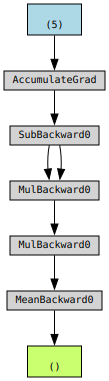

In [39]:
make_dot(a)

### Propagacja wsteczna gradientu

In [40]:
x = torch.ones(1, requires_grad=True)
print(x)
y = (x+4)**3
y

tensor([1.], requires_grad=True)


tensor([125.], grad_fn=<PowBackward0>)

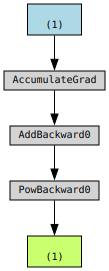

In [41]:
make_dot(y)

In [42]:
y.backward()
x.grad

tensor([75.])

#### Obliczenia z pominięciem gradientów

In [43]:
t1 = torch.rand(3,4, requires_grad=True)
t2 = torch.rand(4,3, requires_grad=True)
with torch.no_grad():
    y = t1@t2
print(y)
print(t1@t2)

tensor([[1.2150, 0.5488, 0.8805],
        [0.8959, 0.7622, 0.8103],
        [0.8422, 0.5755, 0.5863]])
tensor([[1.2150, 0.5488, 0.8805],
        [0.8959, 0.7622, 0.8103],
        [0.8422, 0.5755, 0.5863]], grad_fn=<MmBackward0>)


#### Funkcja backward pozwala nam policzyć pochodną cząstkową w punkcie dla wszystkich źródeł (liści w grafie obliczeń)

In [44]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

In [45]:
w = torch.randn(5, 3, requires_grad=True) #weights
b = torch.randn(3, requires_grad=True) #bias

In [46]:
z = torch.matmul(x, w)+b

In [47]:
loss = torch.abs((z-y)).mean()
loss

tensor(2.8735, grad_fn=<MeanBackward0>)

In [48]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])
tensor([0.3333, 0.3333, 0.3333])


# Regresja raz jeszcze

In [49]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [50]:
X = torch.tensor([apples_kg_ordered,plums_kg_ordered])
Y = torch.tensor(prices)
X = X.T.float()
Y = Y.T
print(X)
print(Y)

tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [51]:
params = torch.rand(2,requires_grad=True)

In [52]:
y_pred = X@params
y_pred

tensor([1.6174, 4.0534, 5.0471, 0.9938, 2.9421], grad_fn=<MvBackward0>)

In [53]:
loss = (torch.square(Y-y_pred)).mean()
loss

tensor(677.9600, grad_fn=<MeanBackward0>)

In [54]:
loss.backward()

In [55]:
params.grad

tensor([-352.0690, -230.6201])

In [56]:
lr = 0.001

In [57]:
print(params)
params - lr *params.grad

tensor([0.1948, 0.4093], requires_grad=True)


tensor([0.5469, 0.6399], grad_fn=<SubBackward0>)

In [58]:
params = torch.rand(2,requires_grad=True)

In [59]:
for epoch in range(50):
    y_pred = X@params
    loss = (torch.square(Y-y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - lr *params.grad) #kopiujemy zeby nie tworzyc grafu
    print(f"Param values: {params[0]:.5}, {params[1]:.5}", f"Gradients: {params.grad[0]:.4}, {params.grad[1]:.4} ")
    print()
    params.grad.zero_()  #To zeruje parametr gradient

Param values: 1.0194, 0.32096 Gradients: -316.6, -226.5 

Param values: 1.2941, 0.5185 Gradients: -274.7, -197.5 

Param values: 1.5325, 0.69086 Gradients: -238.3, -172.4 

Param values: 1.7392, 0.8413 Gradients: -206.7, -150.4 

Param values: 1.9185, 0.97269 Gradients: -179.3, -131.4 

Param values: 2.0739, 1.0875 Gradients: -155.4, -114.8 

Param values: 2.2085, 1.1878 Gradients: -134.7, -100.4 

Param values: 2.3252, 1.2756 Gradients: -116.7, -87.79 

Param values: 2.4263, 1.3525 Gradients: -101.0, -76.86 

Param values: 2.5137, 1.4198 Gradients: -87.46, -67.33 

Param values: 2.5894, 1.4789 Gradients: -75.67, -59.04 

Param values: 2.6548, 1.5307 Gradients: -65.43, -51.81 

Param values: 2.7114, 1.5762 Gradients: -56.54, -45.52 

Param values: 2.7602, 1.6162 Gradients: -48.82, -40.03 

Param values: 2.8023, 1.6515 Gradients: -42.13, -35.25 

Param values: 2.8386, 1.6825 Gradients: -36.32, -31.08 

Param values: 2.8699, 1.71 Gradients: -31.27, -27.44 

Param values: 2.8968, 1.7342 G

### Zadanie
Tym razem na innym targu do ceny owoców doliczany jest stały koszt reklamówki. Napisz model regresji liniowej który oszacuje cenę kg ziemniaków, pomidorów i reklamówki

In [60]:
potatoes_kg_ordered = [1,3,7,3,10,6,8,4,3,1,2,0]
tomatoes_kg_ordered = [5,2,3,1,2,3,6,7,3,2,3,1]
prices = [22.37 , 14.45, 26.6, 10.44, 28.49, 24.52, 40.38, 36.51, 18.50, 10.46, 16.51, 4.58]

In [61]:
X = torch.tensor([potatoes_kg_ordered, tomatoes_kg_ordered]).T.float()
X

tensor([[ 1.,  5.],
        [ 3.,  2.],
        [ 7.,  3.],
        [ 3.,  1.],
        [10.,  2.],
        [ 6.,  3.],
        [ 8.,  6.],
        [ 4.,  7.],
        [ 3.,  3.],
        [ 1.,  2.],
        [ 2.,  3.],
        [ 0.,  1.]])

In [62]:
Y = torch.tensor(prices)
params = torch.rand(2, requires_grad=True)

In [63]:
learning_rate = 0.01
epoch_number = 50

In [64]:
for epoch in range(epoch_number):
    pred = X@params
    loss = ((pred-Y)**2).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - learning_rate * params.grad)
    params.grad.zero_()

In [65]:
print(Y)
X@params

tensor([22.3700, 14.4500, 26.6000, 10.4400, 28.4900, 24.5200, 40.3800, 36.5100,
        18.5000, 10.4600, 16.5100,  4.5800])


tensor([22.2992, 14.2588, 26.5219, 10.2096, 28.6333, 24.4684, 40.7228, 36.5579,
        18.3079, 10.1518, 16.2544,  4.0491], grad_fn=<MvBackward0>)

In [66]:
(Y-X@params).mean(0)

tensor(0.1146, grad_fn=<MeanBackward1>)